In [2]:
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt
import uproot as up
import pandas as pd 
import os

os.environ["HOMELUDO"]="/home/submit/mori25/"
os.environ["DPUSER"]="/work/submit/mori25/Darkphotons_ludo/offline_analysis/"

        mass      effs
0    2.01000  0.422850
1    2.02005  0.423066
2    2.03015  0.427952
3    2.04030  0.432157
4    2.05050  0.430872
..       ...       ...
273  7.84388  0.556268
274  7.88310  0.549252
275  7.92251  0.541407
276  7.96213  0.532400
277  8.00194  0.513666

[278 rows x 2 columns]


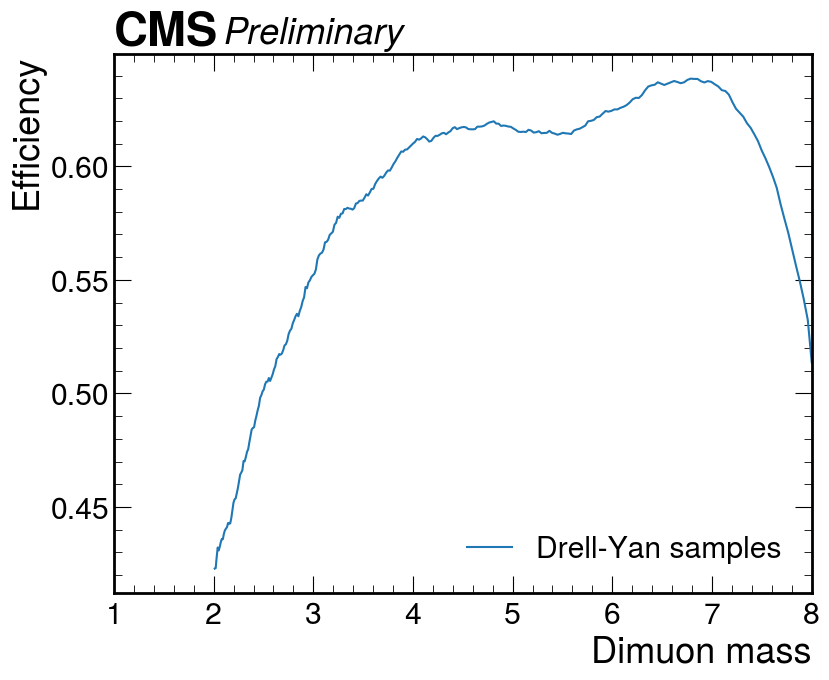

In [3]:
#write code extracting tuples from a csv file and plotting them in a nice cms plot
hep.style.use("CMS")
c = ["orange","red","blue","green"]
fig, ax = plt.subplots(figsize=(9,7))
hep.cms.text("Preliminary")

#open a csv file   
df = pd.read_csv("/work/submit/mori25/Darkphotons_ludo/offline_analysis/limits/efficiencies.csv")
print(df)

# #extract the columns
cut = df['mass']>2
masses = df['mass'][cut]
effs = df['effs'][cut]

# plt.scatter( [mass_Jpsi, mass_Y], [SF_Jpsi, SF_Y], label='Measured SF: Jpsi and Y',color='orange')

plt.plot(masses, effs,label='Drell-Yan samples')
ax.set_xlim(1, 8)
plt.xlabel('Dimuon mass')
plt.ylabel('Efficiency')
# plt.grid(True)
# plt.yscale('log')
plt.legend()
plt.show()

In [4]:

total = '/work/submit/mori25/Darkphotons_ludo/dyturbo-1.3.3/lowmassdyTotal_NNLO_pt0_0p25.txt' 
data_total = np.loadtxt(total, skiprows=1)[:-1]
print(data_total)

pt1 = '/work/submit/mori25/Darkphotons_ludo/dyturbo-1.3.3/lowmassdyFiducial_NNLO_pt1_fun2_0p5.txt' 
data_pt1 = np.loadtxt(pt1, skiprows=1)
# print(data_pt1)

pt2 = '/work/submit/mori25/Darkphotons_ludo/dyturbo-1.3.3/lowmassdyFiducial_NNLO_pt2_1p0.txt' 
data_pt2 = np.loadtxt(pt2, skiprows=1)
# print(data_pt2)

pt3 = '/work/submit/mori25/Darkphotons_ludo/dyturbo-1.3.3/lowmassdyFiducial_NNLO_pt3_func2_0p5.txt' 
data_pt3 = np.loadtxt(pt3, skiprows=1)
# print(data_pt3)

fiducial = np.concatenate([data_pt1[:-1],data_pt2[:-1],data_pt3[:-1]])[:-2]
print(fiducial)


bin_centers =(fiducial[:,0]+fiducial[:,1])/2
scale_DP_10GeV = 581/data_total[-1,2]



[[1.00000000e+00 2.00000000e+00 1.11661825e+08 7.04490518e+05]
 [2.00000000e+00 3.00000000e+00 5.82608937e+07 3.42567992e+05]
 [3.00000000e+00 4.00000000e+00 3.08766875e+07 9.91784571e+04]
 [4.00000000e+00 5.00000000e+00 1.60273447e+07 3.66776370e+04]
 [5.00000000e+00 6.00000000e+00 9.09740777e+06 2.45677306e+04]
 [6.00000000e+00 7.00000000e+00 5.56719535e+06 2.08595419e+04]
 [7.00000000e+00 8.00000000e+00 3.61420234e+06 1.71150639e+04]
 [8.00000000e+00 9.00000000e+00 2.45797347e+06 1.53691764e+04]
 [9.00000000e+00 1.00000000e+01 1.73484803e+06 1.16682600e+04]]
[[1.00000000e+00 2.00000000e+00 5.07100345e+05 6.42012453e+03]
 [2.00000000e+00 3.00000000e+00 2.59033511e+05 1.62907002e+03]
 [3.00000000e+00 4.00000000e+00 1.69970058e+05 9.96376706e+02]
 [4.00000000e+00 5.00000000e+00 1.25983421e+05 8.74371589e+02]
 [5.00000000e+00 6.00000000e+00 9.95825457e+04 7.82783693e+02]
 [6.00000000e+00 7.00000000e+00 8.72953303e+04 6.68230542e+02]
 [7.00000000e+00 8.00000000e+00 8.52494196e+04 9.66757

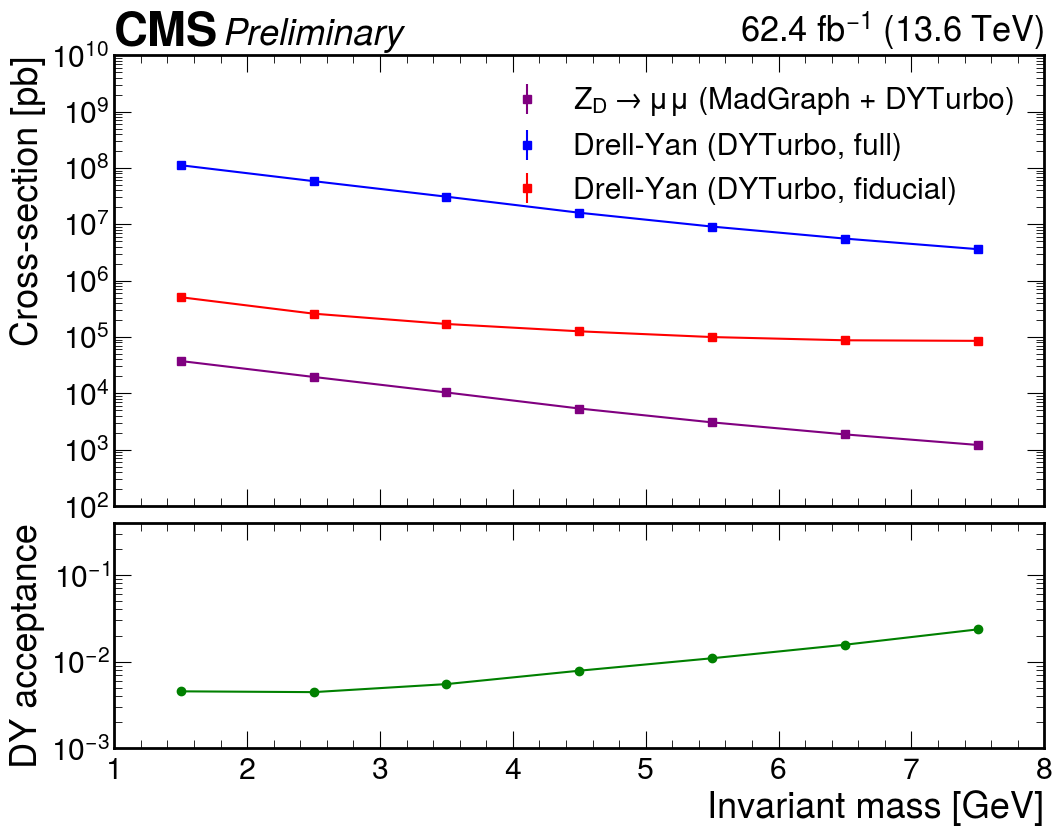

In [6]:
d = up.concatenate("/data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_lmDY/dump_post_BDT/DimuonTree*.root:tree", ["Mm_mass","HLT_DoubleMu4_3_LowMass", "forest_prompt_Jpsi_mva","Muon_softMva1","Muon_softMva2"],library='pd')
d = d[d["Mm_mass"] > 0]


In [7]:
def compute_eff(m,mva_wp,id_wp,m_window = 0.1, var_window=False,den_ID_tr = False):
    if var_window:
        d_mass = d[(d["Mm_mass"]>m-m_window*m)&(d["Mm_mass"]<m+m_window*m)]
    else: 
        d_mass = d[(d["Mm_mass"]>m-m_window)&(d["Mm_mass"]<m+m_window)]
    if den_ID_tr:
        den = np.sum((d_mass["HLT_DoubleMu4_3_LowMass"]==1)&(d_mass["Muon_softMva1"]>id_wp)&(d_mass["Muon_softMva2"]>id_wp))
    else:
        den = len(d_mass)
    num = np.sum((d_mass["HLT_DoubleMu4_3_LowMass"]==1)&(d_mass["forest_prompt_Jpsi_mva"]>mva_wp)&(d_mass["Muon_softMva1"]>id_wp)&(d_mass["Muon_softMva2"]>id_wp))
    return num/den, den
compute_eff(3.1,0.8,0.4)

(0.6702673213311511, 9165)

In [8]:
mass = np.linspace(2,8,10)
np.vectorize(lambda m : compute_eff(m,0.8,0.4,m_window=0.1)[0])(mass)

array([0.56574761, 0.64518439, 0.68313316, 0.68865199, 0.68333005,
       0.67023844, 0.68550532, 0.70684761, 0.68918461, 0.60130485])

In [9]:
print(len(d))

650719


In [10]:
def plot_acc(window=0.1,n=100,plot_total_N=False,var_window=False):
    c = ["orange","red","blue","green"]
    fig, ax = plt.subplots(figsize=(12,9))
    hep.cms.label("Preliminary",data=True,lumi=62.4,com=13.6)


    mass = np.linspace(2,8,n)
    ax.plot(mass, np.vectorize(lambda m : compute_eff(m,0.8,0.4,m_window=window, var_window=var_window)[plot_total_N])(mass),label='Trigger,ID,MVA')
    ax.plot(mass, np.vectorize(lambda m : compute_eff(m,-1,0.4,m_window=window, var_window=var_window)[plot_total_N])(mass),label='Trigger,ID')
    ax.plot(mass, np.vectorize(lambda m : compute_eff(m,-1,-2,m_window=window, var_window=var_window)[plot_total_N])(mass),label='Trigger')
    ax.set_xlim(1, 8)
    ax.set_xlabel('Dimuon mass')
    if plot_total_N : ax.set_ylabel(f"N in mass window +/- {window}") 
    else: ax.set_ylabel('Efficiency')
    # plt.grid(True)
    # plt.yscale('log')
    if not plot_total_N: 
        ax.set_ylim(0.4,1)
        ax.text(1.2, 0.7, f"Mass window = +/- {window}", fontsize=12)
    plt.legend()
    plt.show()

def plot_mva(window=0.1,n=100,plot_total_N=False,var_window=False):
    c = ["orange","red","blue","green"]
    fig, ax = plt.subplots(figsize=(12,9))
    hep.cms.label("Preliminary",data=True,lumi=62.4,com=13.6)

    mass = np.linspace(2,8,n)
    ax.plot(mass, np.vectorize(lambda m : compute_eff(m,0.8,0.4,m_window=window, var_window=var_window,den_ID_tr=True)[plot_total_N])(mass),label='MVA|Trigger,ID')
    ax.set_xlim(1, 8)
    ax.set_xlabel('Dimuon mass')
    if plot_total_N : ax.set_ylabel(f"N in mass window +/- {window}") 
    else: ax.set_ylabel('Efficiency')
    # ax.grid(True)
    # plt.yscale('log')
    if not plot_total_N: 
        ax.set_ylim(0.4,1)
        ax.text(1.2, 0.7, f"Mass window = +/- {window}", fontsize=12)
    plt.legend()
    plt.show()


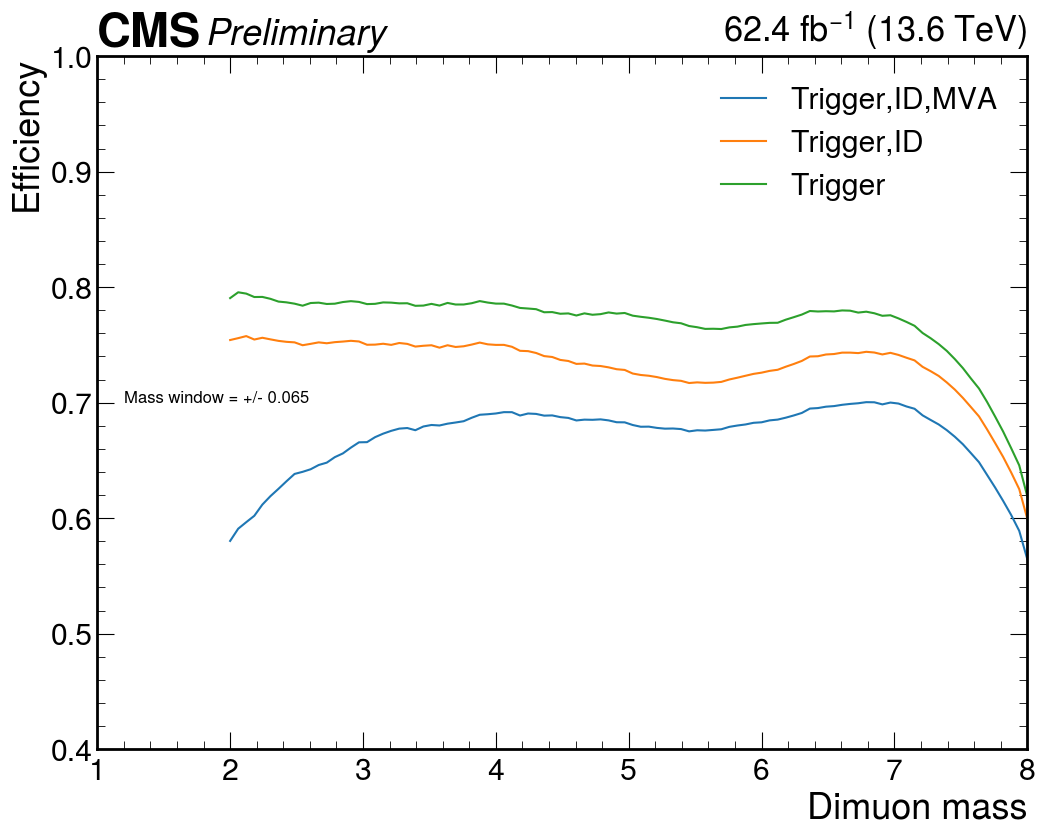

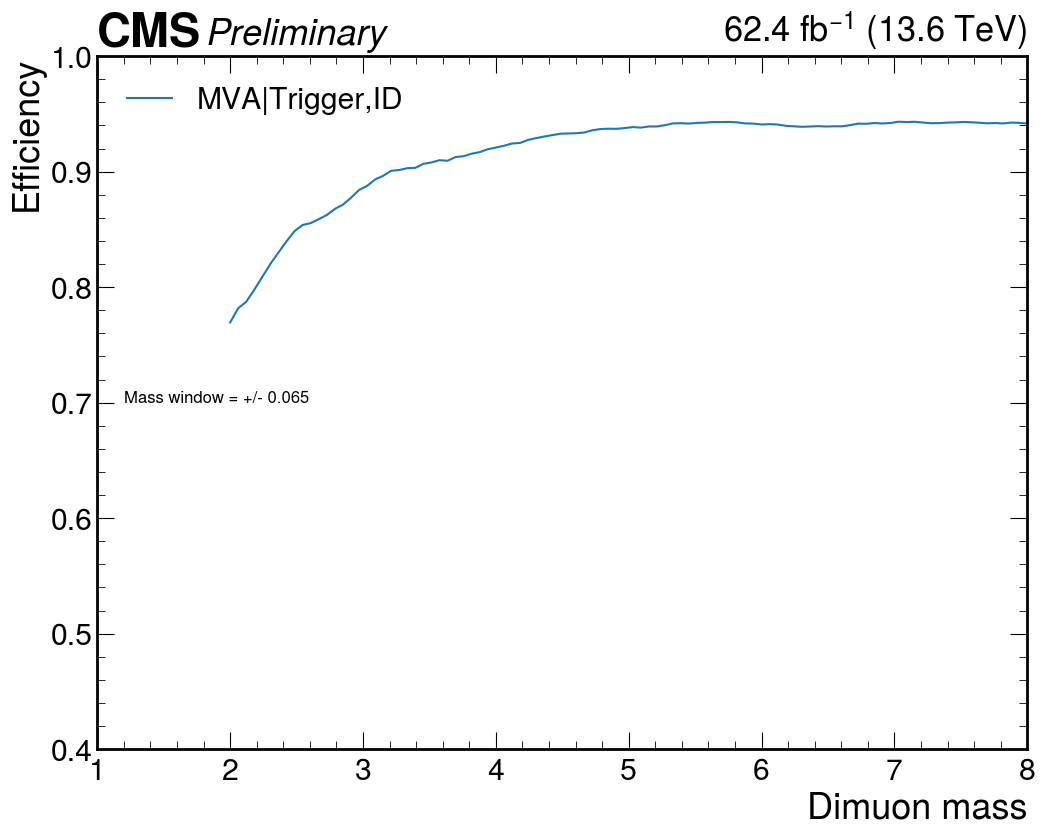

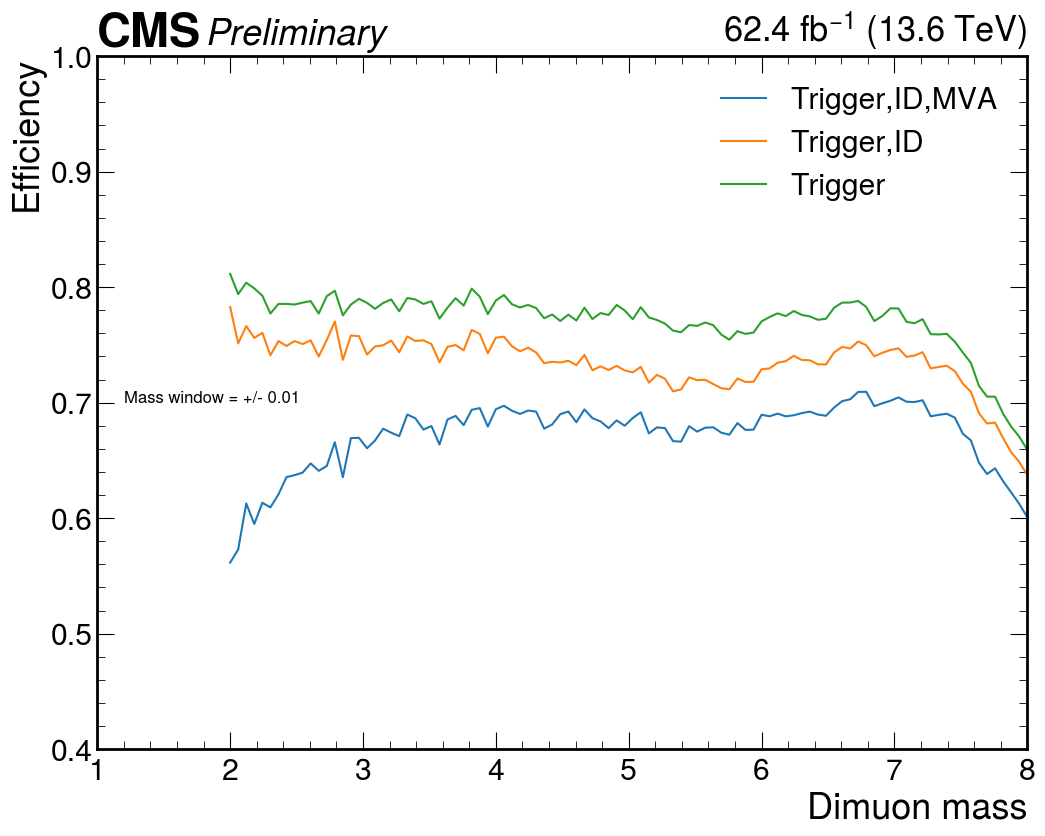

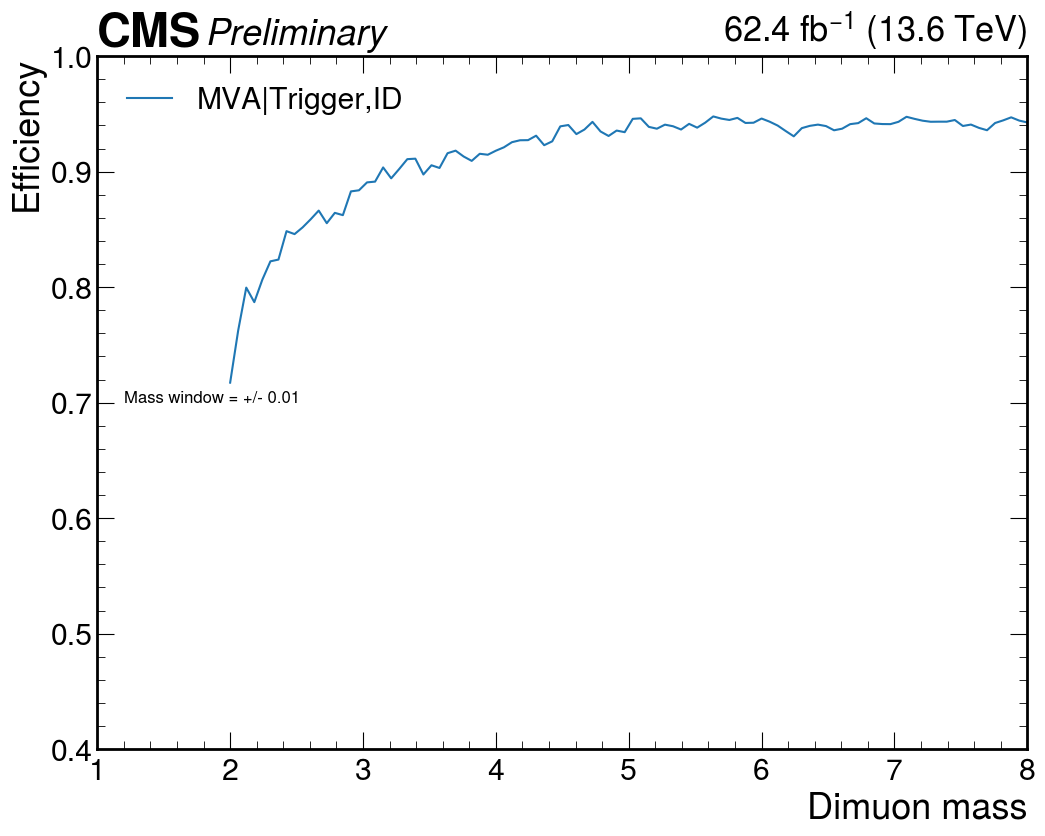

In [11]:
# windows = [0.05,0.1,0.5] 
windows = [5*0.013,0.01,0.2]
for w in windows[:2]:
    plot_acc(window=w,var_window=True
             )
    
    # plot_acc(window=w,plot_total_N=True,var_window=False
    #          )
    plot_mva(window=w,var_window=True)